불균형 데이터

https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data

https://www.kaggle.com/code/jiedong00/anomaly-detection-with-unsupervised-learning

https://www.kaggle.com/code/minjungsys/autoencoder

https://www.kaggle.com/code/victorambonati/unsupervised-anomaly-detection

https://www.kaggle.com/code/robinteuwens/anomaly-detection-with-auto-encoders

https://www.kaggle.com/code/imrandude/h2o-autoencoders-and-anomaly-detection-python

https://www.kaggle.com/code/averkij/anomaly-detection-methods#Data-preparation

https://www.kaggle.com/code/gamalahmed32/p2-autoencoder-for-anomaly-detection-in-ecg

https://www.kaggle.com/code/lizhecheng/autoencoder-combination-baseline

https://www.kaggle.com/code/osciiart/denoising-autoencoder

https://www.kaggle.com/code/hone5com/fraud-detection-with-variational-autoencoder

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import numpy as np # linear algebra
import pandas as pd

In [3]:
!unzip -qq "/content/gdrive/MyDrive/archive.zip"

In [4]:
df = pd.read_csv("/content/creditcard.csv")

In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [6]:
# 시각화 라이브러리 설정
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

# RANDOM_SEED와 LABELS 설정
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [7]:
df.shape

(284807, 31)

In [8]:
df.isnull().values.any()

False

In [9]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
#타겟 분포 확인
count_classes = pd.value_counts(df['Class'], sort=True)

In [11]:
count_classes

0    284315
1       492
Name: Class, dtype: int64

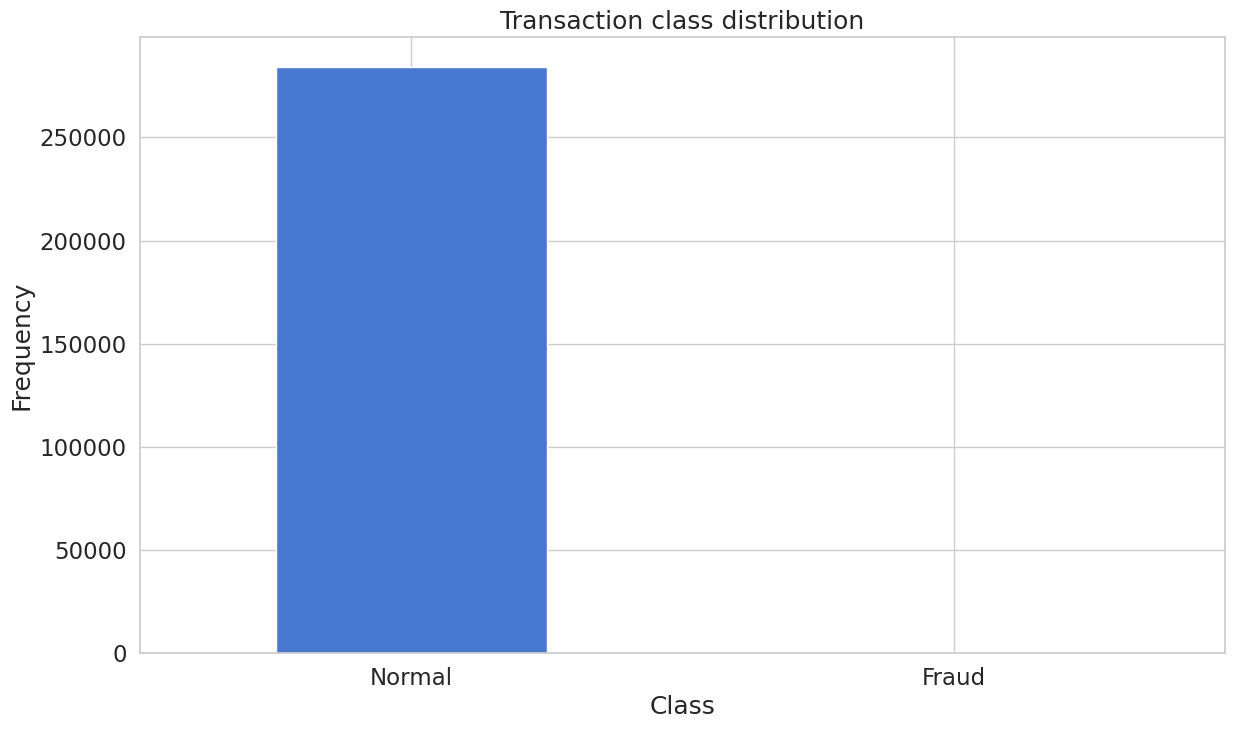

In [12]:
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [13]:
#frauds는 이상한 타겟
#normal은 정상인 타겟
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [14]:
frauds.shape

(492, 31)

In [15]:
normal.shape

(284315, 31)

In [16]:
#frauds의 amount행
frauds.Amount

541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64

In [17]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
frauds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [20]:
normal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [21]:
frauds.Amount

541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64

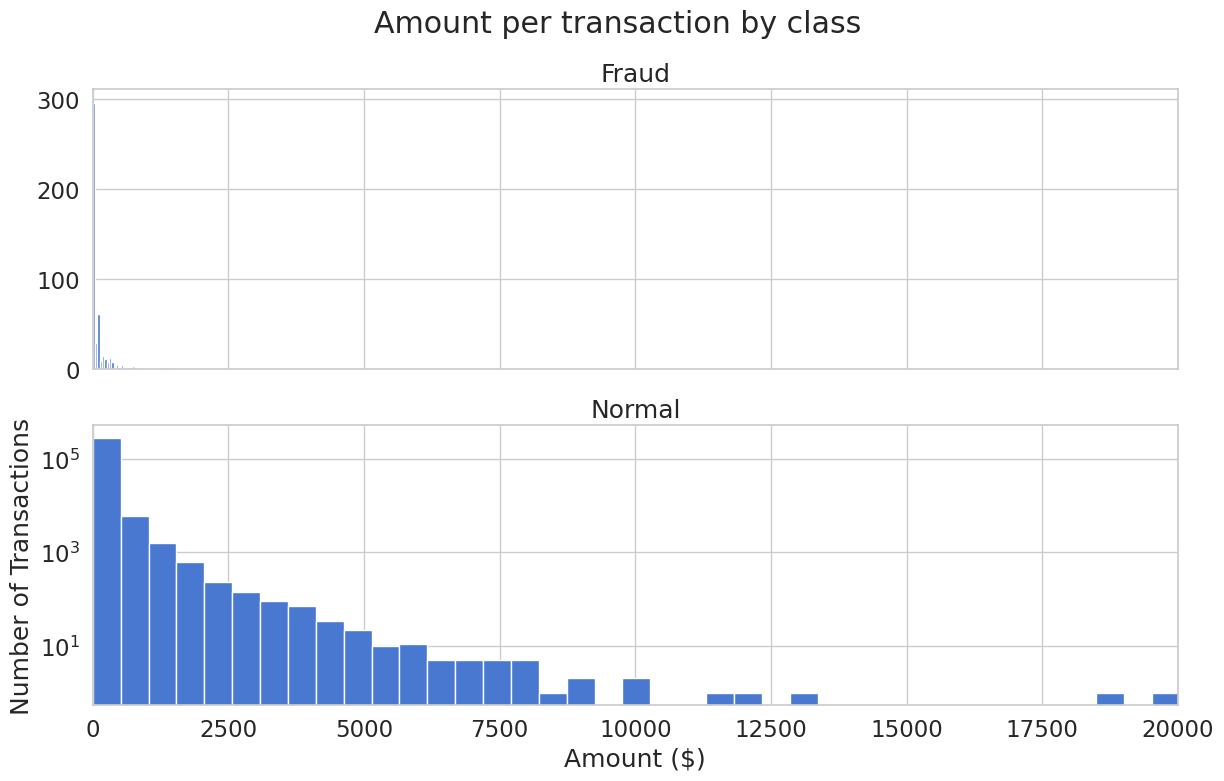

In [22]:
#class별 amount 분포
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

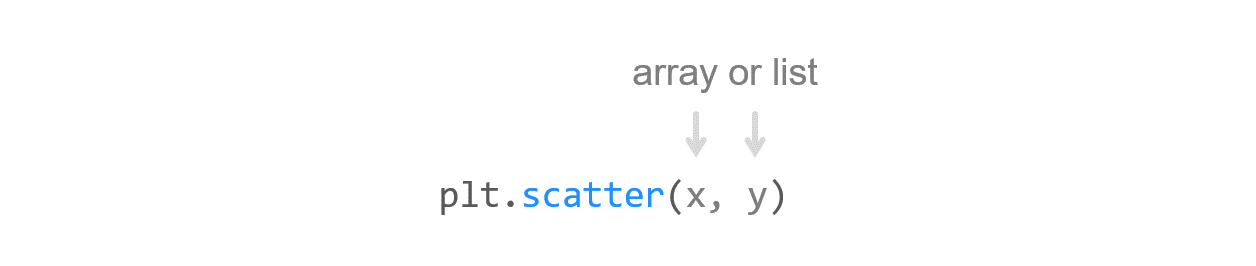

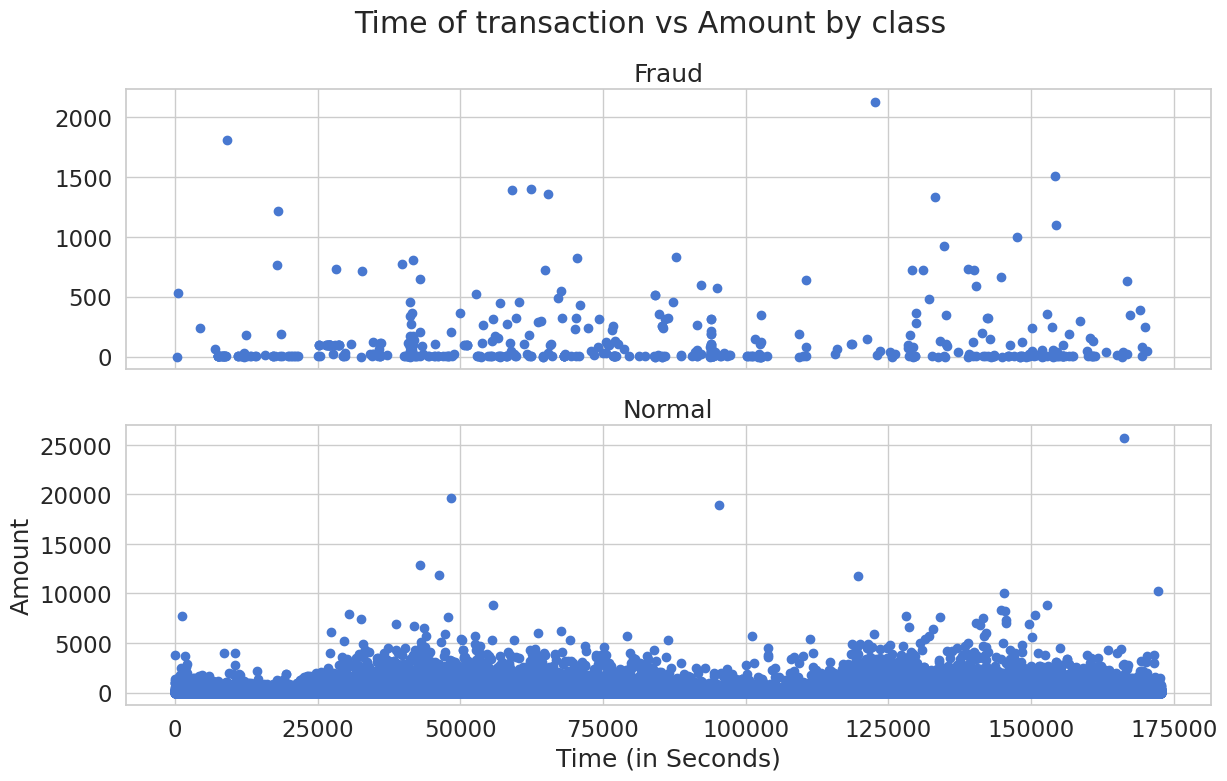

In [23]:
#시간당 amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
data = df.drop(['Time'], axis=1)

In [26]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
#reshape(-1, 1)는 2차원 배열을 만든다는 의미

In [27]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [28]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

In [29]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834,1
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.726255,0
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.229289,0
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.347232,0
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.349671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,-0.100318,...,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,-0.050614,0
252263,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,-0.708527,...,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,-0.313289,0
221246,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,0.402303,...,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,-0.322724,0
81910,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,0.579396,...,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,-0.338876,0


In [30]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289,0
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717,0
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292,0
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306,0
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,-0.345313,0
259178,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,0.003520,0
131932,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,-0.337477,0
146867,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,-0.349231,0


In [31]:
#이상이 없는 것만
X_train = X_train[X_train.Class == 0]

In [32]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289,0
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717,0
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292,0
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306,0
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,-0.345313,0
259178,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,0.003520,0
131932,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,-0.337477,0
146867,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,-0.349231,0


In [33]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289,0
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717,0
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292,0
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306,0
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,-0.345313,0
259178,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,0.003520,0
131932,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,-0.337477,0
146867,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,-0.349231,0


In [34]:
X_train = X_train.drop(['Class'], axis=1)

In [35]:
#test데이터의 타겟값을 가지고 온다.
y_test = X_test['Class']

In [36]:
#테스트 데이터에서 학습부분을 담당
X_test = X_test.drop(['Class'], axis=1)

In [37]:
# values 넘파이로 바꾸기
X_train = X_train.values
X_test = X_test.values

In [38]:
#학습데이터의 train
X_train.shape

(227451, 29)

In [39]:
#테스트데이터의 train
X_test.shape

(56962, 29)

In [40]:
#학습데이터 칼럼 갯수
input_dim = X_train.shape[1]

In [41]:
input_dim

29

In [42]:
#autoencoder의 목표는 입력 데이터를 잠재 변수(latent variable)로 압축하고, 이를 통해 원래 데이터를 복원하는 것입니다. 
#이때, 잠재 변수의 차원이 입력 데이터보다 작으면 압축된 데이터를 보다 효율적으로 표현할 수 있습니다.
#따라서 29보다 작은 14로 둔것. 커도 상관은 없지만, 과적합의 우려가 생긴다.
encoding_dim = 14

In [43]:
input_layer = Input(shape=(input_dim,))

In [44]:
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)

In [45]:
encoder = Dense(int(encoding_dim/2), activation="relu")(encoder)

In [46]:
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [47]:
nb_epoch = 100
batch_size=32
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

ModelCheckpoint 콜백은 Keras 모델을 학습할 때, 특정 조건을 만족할 때 모델의 체크포인트를 저장하는 기능을 제공합니다. 즉, 특정 epoch마다 모델의 상태를 저장하고, 이를 통해 학습 중 모델이 최적의 성능을 보여줄 때, 그 상태를 저장할 수 있습니다. 이렇게 저장된 모델의 체크포인트는 나중에 모델을 로드하여 사용할 수 있습니다.

In [48]:
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)

TensorBoard 콜백은 Keras 모델을 학습할 때, 모델의 학습 정보를 시각화하여 모니터링할 수 있는 기능을 제공합니다. 즉, 학습 과정에서 발생한 로스(loss), 정확도(accuracy), 그래디언트(gradient), 가중치(weight) 등의 정보를 시각화하여 그래프로 나타내어 보여줍니다. 이렇게 시각화된 정보를 통해 모델의 학습 상태를 실시간으로 확인할 수 있습니다.

In [49]:
tebsorboard = TensorBoard(log_dir='/logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

Keras의 fit() 메소드에서 verbose 인자는 학습과정을 출력하는 방식을 설정하는 인자입니다. verbose 인자에 지정할 수 있는 값은 다음과 같습니다.

verbose=0 : 아무런 출력도 하지 않습니다.
verbose=1 : 학습 진행 상황을 보여주는 진행 막대(progress bar)를 출력합니다.
verbose=2 : 학습 진행 상황을 출력하지 않고, 한 에폭(epoch)당 한 줄씩 출력합니다.
verbose=3 이상 : 한 에폭(epoch)당 한 줄씩 출력합니다.

In [50]:
history = autoencoder.fit(X_train,X_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test,X_test),
                          verbose=1,
                          callbacks = [checkpointer,tebsorboard]).history

Epoch 1/100
7108/7108 [==============================] - 14s 2ms/step - loss: 0.8188 - accuracy: 0.5869 - val_loss: 0.7841 - val_accuracy: 0.6760
Epoch 2/100
7108/7108 [==============================] - 13s 2ms/step - loss: 0.7422 - accuracy: 0.6836 - val_loss: 0.7661 - val_accuracy: 0.6908
Epoch 3/100
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7306 - accuracy: 0.6966 - val_loss: 0.7587 - val_accuracy: 0.6985
Epoch 4/100
7108/7108 [==============================] - 15s 2ms/step - loss: 0.7241 - accuracy: 0.7067 - val_loss: 0.7552 - val_accuracy: 0.7158
Epoch 5/100
7108/7108 [==============================] - 13s 2ms/step - loss: 0.7210 - accuracy: 0.7114 - val_loss: 0.7529 - val_accuracy: 0.7156
Epoch 6/100
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7190 - accuracy: 0.7142 - val_loss: 0.7523 - val_accuracy: 0.7119
Epoch 7/100
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7174 - accuracy: 0.7155 - val_loss: 0.7576 -

In [51]:
autoencoder = load_model('model.h5')

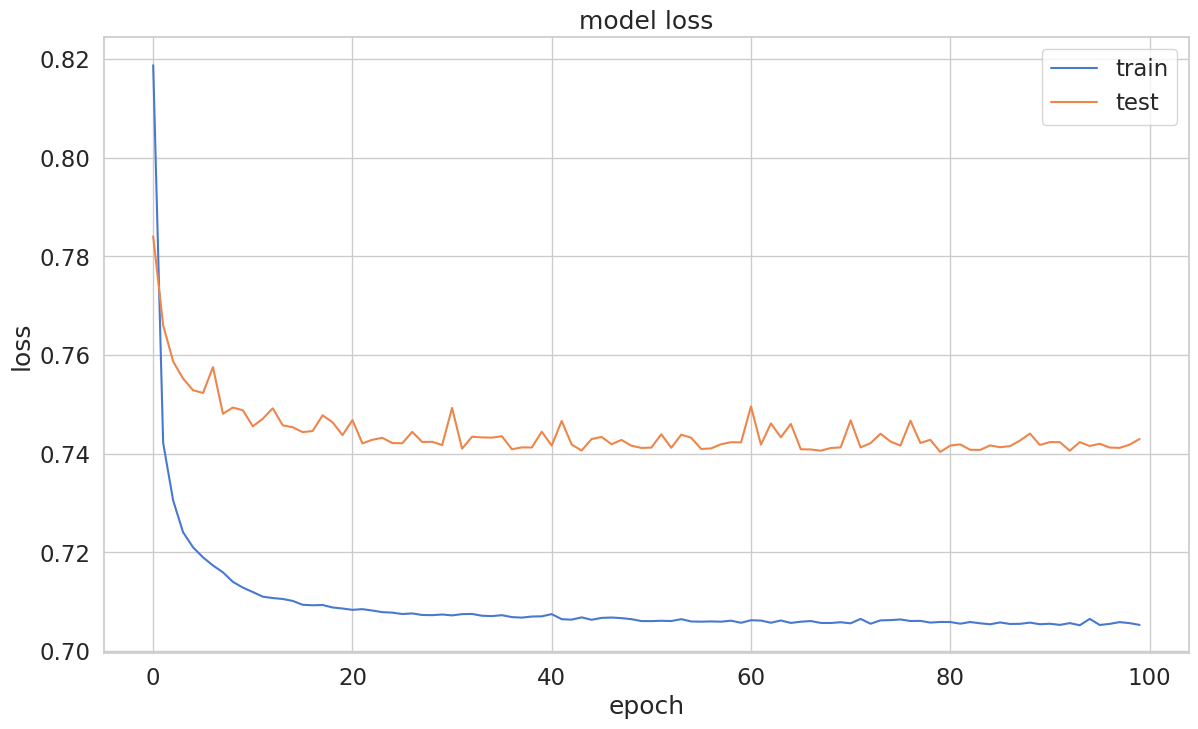

In [52]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')

reconstruction_error는 오토인코더(Autoencoder) 모델에서 입력 데이터(input data)를 출력으로 재구성(reconstruction)할 때, 입력 데이터와 출력 사이의 차이를 측정하는 지표

즉, 복원 데이터와 입력데이터 간의 차이를 의미하는 것


이 때, 입력 데이터와 출력 데이터 간의 차이를 계산하여 reconstruction_error를 측정합니다. 일반적으로는 평균 제곱 오차(mean squared error)나 교차 엔트로피 오차(cross entropy error)를 사용하여 계산합니다.

이러한 reconstruction_error는 오토인코더 모델의 학습과정에서 손실 함수(loss function)으로 사용되며, 학습이 진행됨에 따라 점차 감소하는 것이 목표입니다. 또한, reconstruction_error를 통해 모델의 성능을 평가할 수 있습니다.

In [53]:

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test-predictions,2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 [==============================] - 2s 1ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.739447,0.001720
std,3.441759,0.041443
min,0.059620,0.000000
25%,0.236049,0.000000
50%,0.380198,0.000000
75%,0.607788,0.000000
max,262.810082,1.000000


In [54]:
#true_class는 말그대로 진짜 레이블 값을 의미하고
# reconstruction은 원본 값과 복원 값의 차이를 의미한다.
error_df

,reconstruction_error,true_class
43428,81.079533,1
49906,0.862257,0
29474,0.239467,0
276481,0.332446,0
278846,0.183625,0
...,...,...
75723,0.731413,0
252263,0.195597,0
221246,0.532094,0
81910,0.123650,0


normal_error_df는 이상 감지(anomaly detection)에서 정상 데이터(normal data)와 이상 데이터(anomalous data) 간의 차이를 측정하는 지표로 사용되는 데이터 프레임

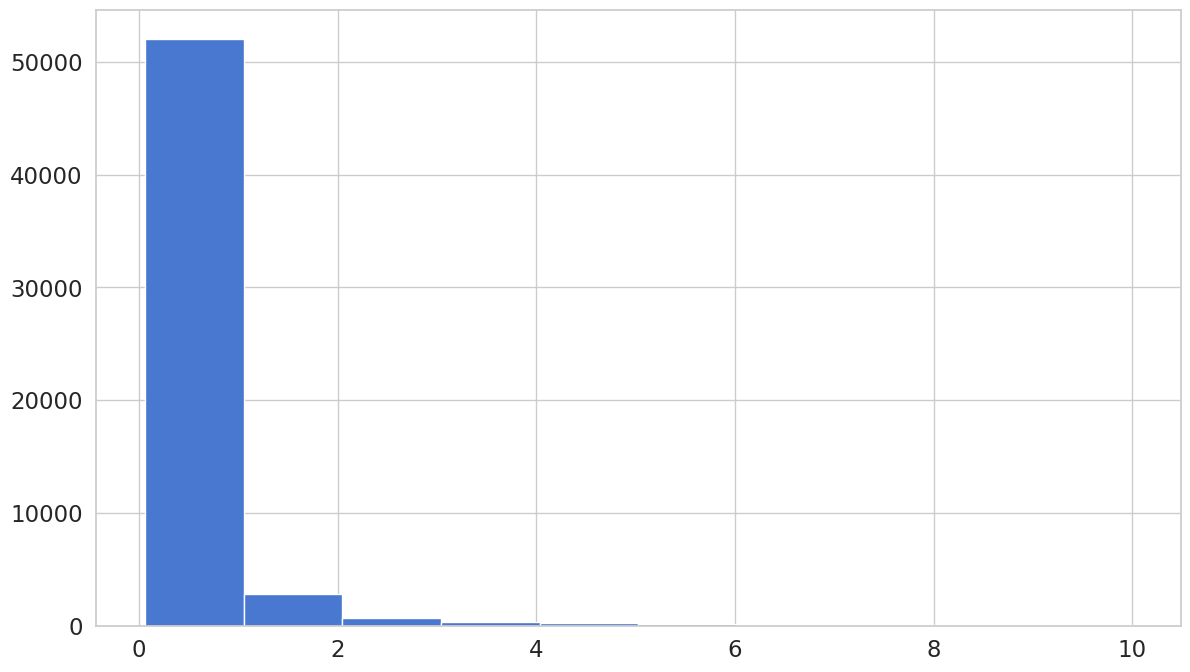

In [55]:
# fig.add_subplot(111)은 유일한 subplot을 생성하고 이곳에 그래프를 그리겠다는 의미
#true_class가 0일때 reconstruction_error
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

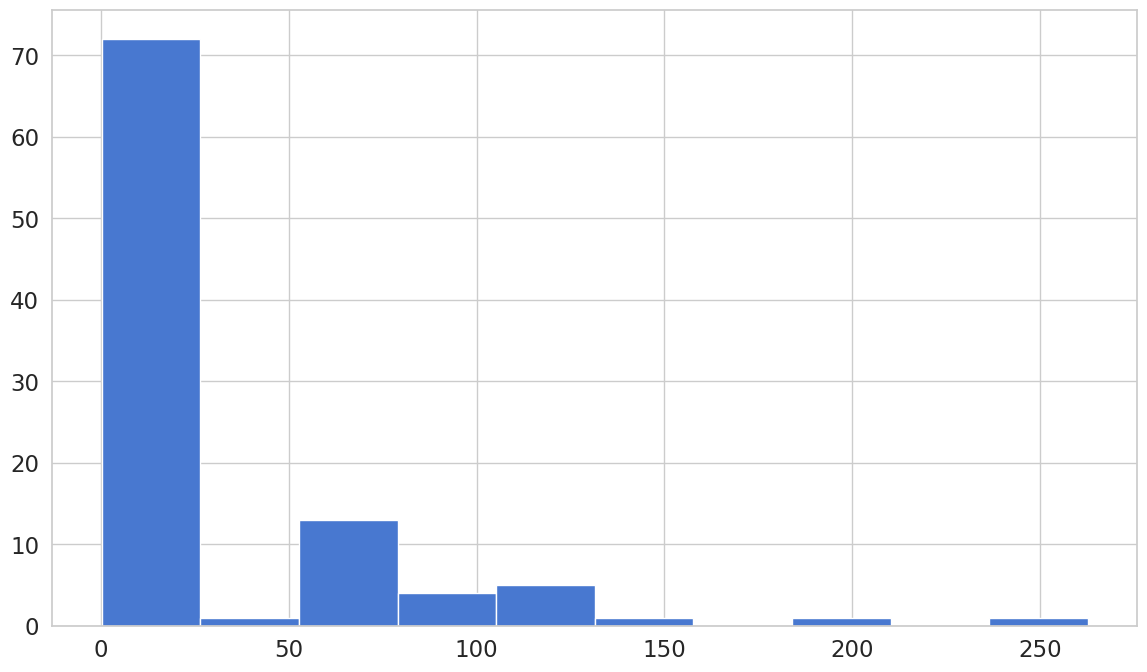

In [56]:
#true_class가 1일때 reconstruction_error
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values,bins=10)

In [57]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

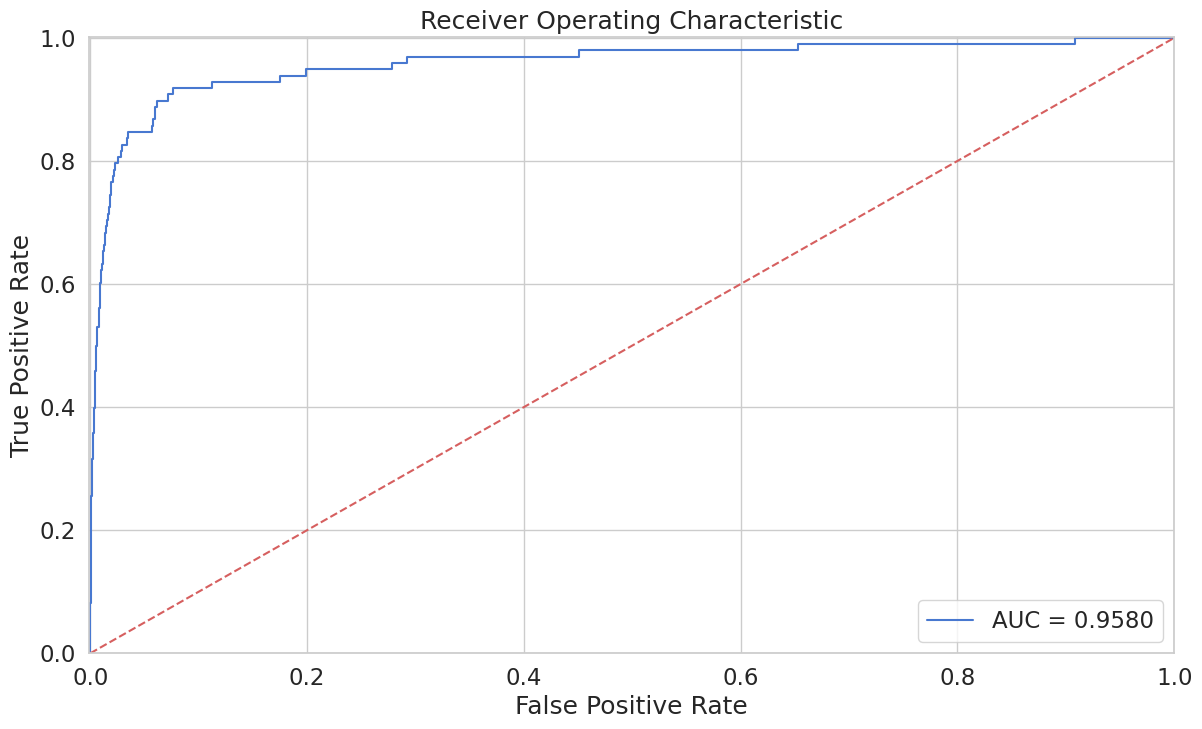

In [58]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

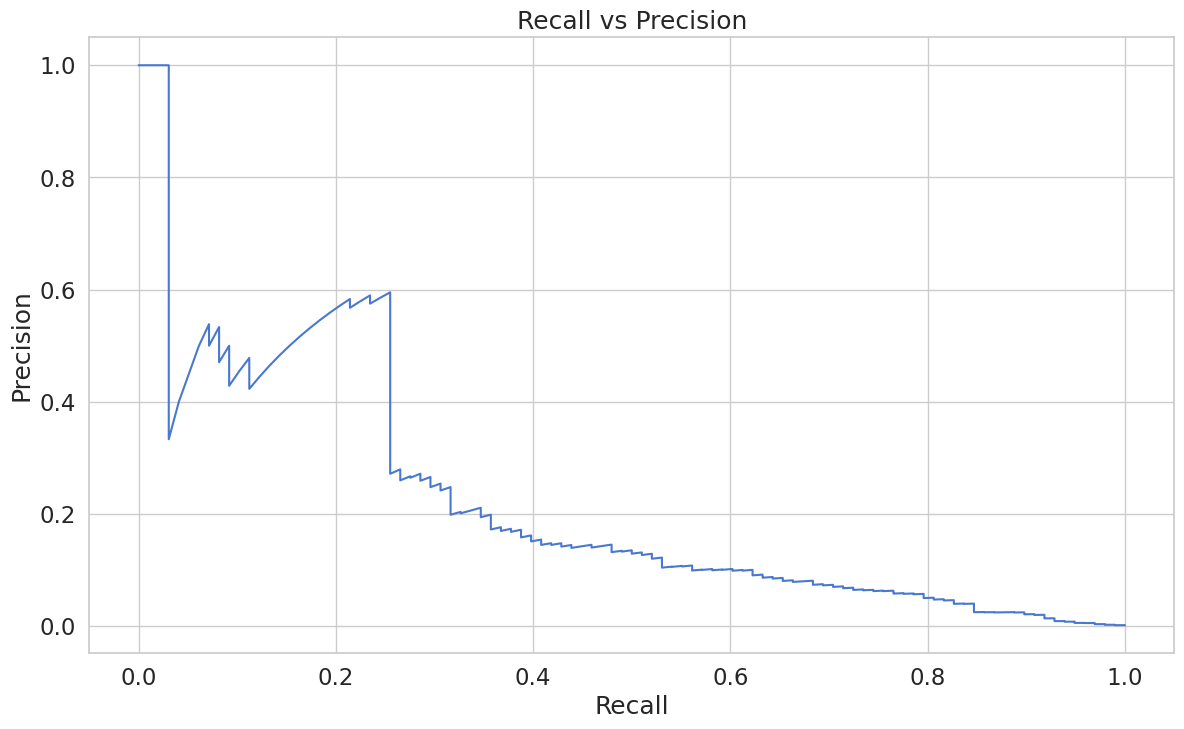

In [59]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

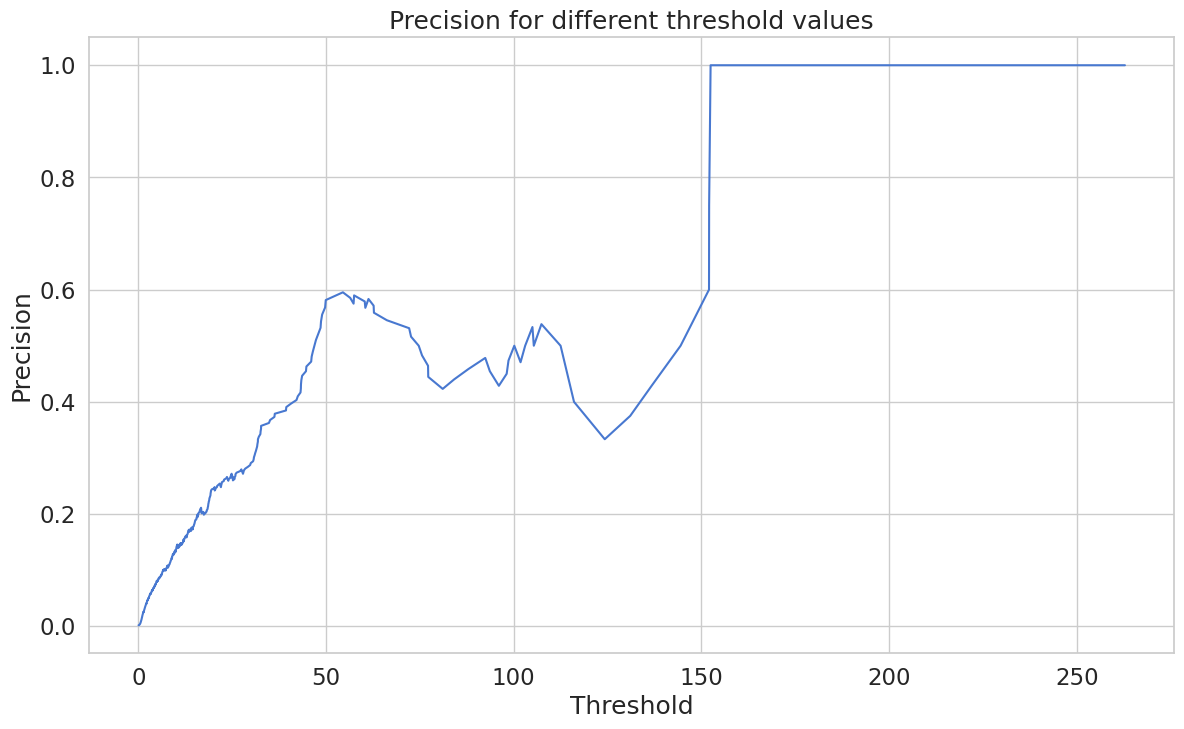

In [60]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

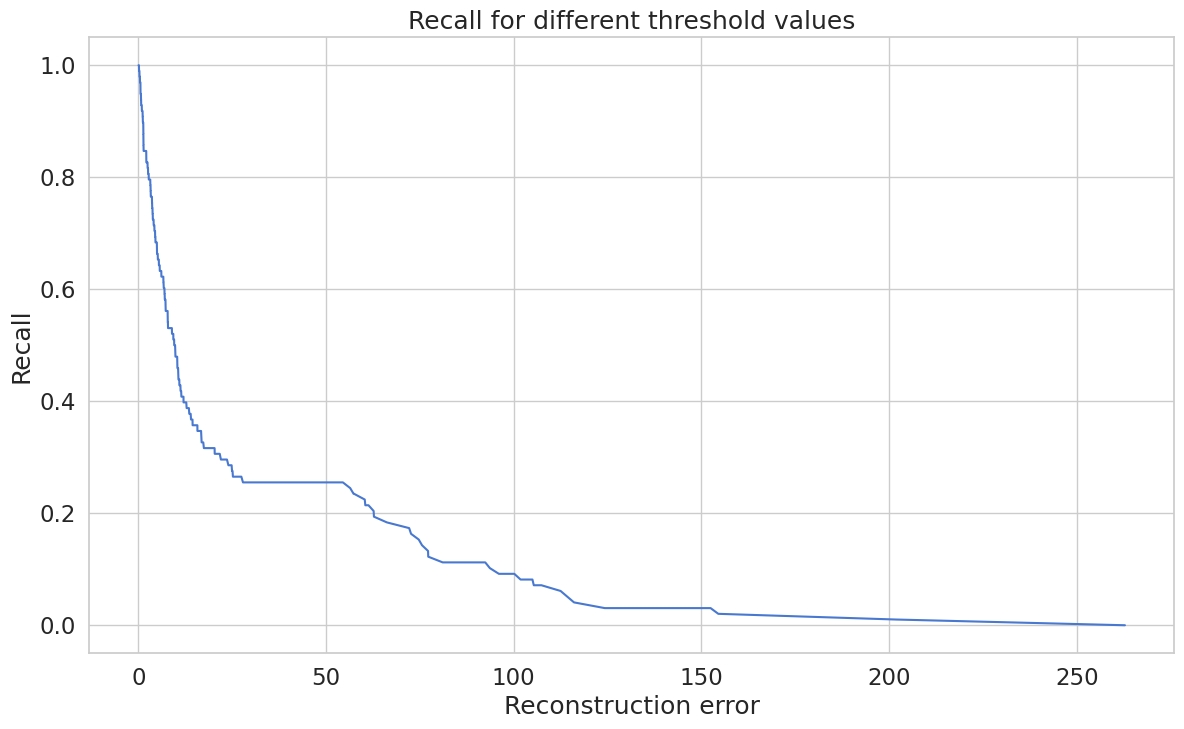

In [61]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [62]:
error_df

,reconstruction_error,true_class
43428,81.079533,1
49906,0.862257,0
29474,0.239467,0
276481,0.332446,0
278846,0.183625,0
...,...,...
75723,0.731413,0
252263,0.195597,0
221246,0.532094,0
81910,0.123650,0


In [63]:
threshold=4.0

ms=3.5는 원의 크기를 3.5로 설정합니다. linestyle=''는 선 스타일을 점으로 설정합니다. 마지막으로 label= "Fraud" if name == 1 else "Normal"은 그래프의 범례를 설정합니다. name이 1인 경우 "Fraud"로, 그 외에는 "Normal"로 레이블을 설정합니다.

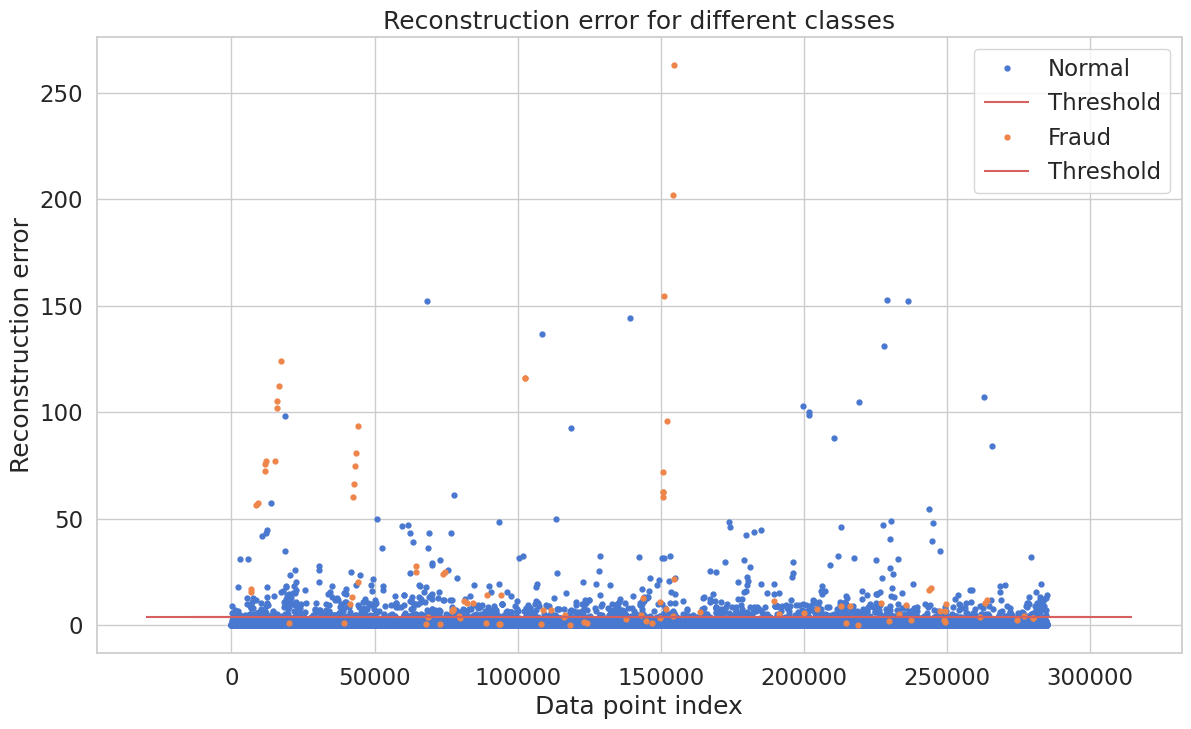

In [70]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
  ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5,linestyle='',
            label= "Fraud" if name == 1 else "Normal")
  ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors='r', zorder=100, label = 'Threshold')
  ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

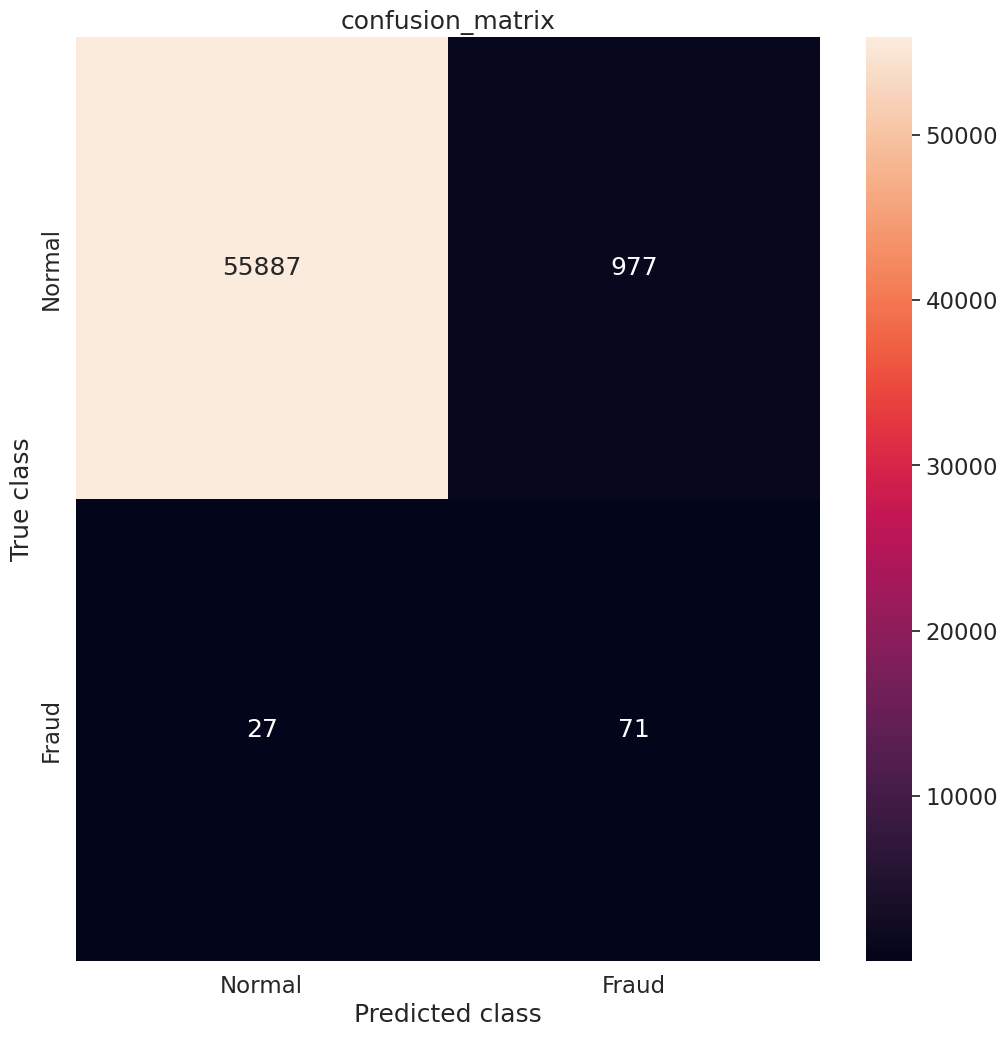

In [74]:
#임계치 이상이면 이상1, 아니면 정상0
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("confusion_matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()